In [1]:
import gym

# Trading Framework

This framework is developed based on Tito Ingargiola's amazing work on https://github.com/hackthemarket/gym-trading. 

In [2]:
import gym_trading
from gym_trading.envs.Q_learning import Q

C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



First, define the address for the CSV data


In [3]:
csv = r"C:\Users\Henry\Documents\Python Stuff\Upwork Trial\Forex Ai\GBPUSD240.csv"

# Create a new OpenAI Gym environment with the customised Trading environment



 .initialise_simulator() must be invoked after **env.make('trading-v0')** . Within this function, provide these arguments:


* **csv**: Address of the data


* **ATR**: True/ False, (The only indicator available now)



* **trade_period**: (1 - 10), Holding period for each trades. *Default: 1*


* **train_split**: (0.0,1.0), Percentage of data set for training. *Default: 0.7*

In [4]:
env = gym.make('trading-v0')
env.initialise_simulator(csv, ATR=True, trade_period=5, train_split=0.7)

[2017-07-10 21:55:42,235] Making new env: trading-v0


Please invoke .initialise_simulator() method next to complete initialization


# Additional functions

* Adding a dummy closing price

dummy price can be added into the environment by passing in 'dummy_period'. However, this will enlarge the Q-table, hence running training episode will take significantly longer.

In [20]:
#env = gym.make('trading-v0')
#env.initialise_simulator(csv, ATR=True, trade_period=5, train_split=0.7, dummy_period=1)

* Adding intermarket forex price to the environment

Intermarket FX closing prices can be added to the environment as well. Likewise, this leads to a siginificant slowdown in training and testing later

In [ ]:
#env = gym.make('trading-v0')
#env.initialise_simulator(csv, ATR=True, trade_period=5, train_split=0.7)

#csv = 'another_market.csv'
#env.add_market(csv)

# States map

states_map is a discretized observation space bounded by the extreme values Return and ATR, with an interval of 0.5. For every new observation (Return, ATR) tuple pair, it is approximated to the closest pair on states_map. States_map corresponds to the row index of lookup_table

In [5]:
env.sim.states

array([[-0.10961126, -0.14618451],
       [-0.10964831, -0.17137485],
       [ 0.55212637, -0.10433901],
       ..., 
       [ 0.96428311, -1.16844059],
       [-0.20206465, -1.15859194],
       [ 0.46496368, -1.1960166 ]])

# Next, Create Q_learning framework

This framework wraps around the trading environment.

Arguments:

* **env**: gym_trading Environment

* **train_episodes**: Number of train episodes to update Q_table

* **learning_rate**: *Default: 0.2*

* **gamma**: *Default: 0.9* 

    Upon initializing, Q_learning has zeroed Q_table **lookup_table** and **states_map**
    
 


In [6]:
Q_learning = Q(env, train_episodes=1000, learning_rate=0.2, gamma=0.9)

# States_map
**states_map** is a discretized observation space bounded by the extreme values *Return* and *ATR*, with an interval of 0.5.
For every new observation *(Return, ATR) tuple pair*, it is approximated to the closest pair on **states_map**.  **States_map** corresponds to the row index of **lookup_table**


In [7]:
Q_learning.states_map.shape

(3003, 2)

# Q Table
**lookup_table** has row size the length of **states_map** and column size of 3 (actions (0,1,2).).

In [8]:
Q_learning.lookup_table

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

All zero now, not trained yet

# Training

Filling up the Q Table

In [9]:
Q_learning.train()

Training period  2009-12-23 08:00:00 - 2013-09-05 16:00:00
End of Episode 1, Total Reward is -2507.7, Average Reward is -3.27375979112
End of Episode 2, Total Reward is -1674.4, Average Reward is -1.71031664964
End of Episode 3, Total Reward is 1791.1, Average Reward is 3.62570850202
End of Episode 4, Total Reward is 3321.3, Average Reward is 7.77822014052
End of Episode 5, Total Reward is -4743.2, Average Reward is -5.37777777778
End of Episode 6, Total Reward is -1216.6, Average Reward is -1.71111111111
End of Episode 7, Total Reward is -669.3, Average Reward is -1.3072265625
End of Episode 8, Total Reward is -243.4, Average Reward is -0.656064690027
End of Episode 9, Total Reward is -439.8, Average Reward is -1.09675810474
End of Episode 10, Total Reward is 867.1, Average Reward is 2.49166666667
End of Episode 11, Total Reward is -4924.7, Average Reward is -6.28150510204
End of Episode 12, Total Reward is 912.2, Average Reward is 1.71789077213
End of Episode 13, Total Reward is 126.

# Summary of Training

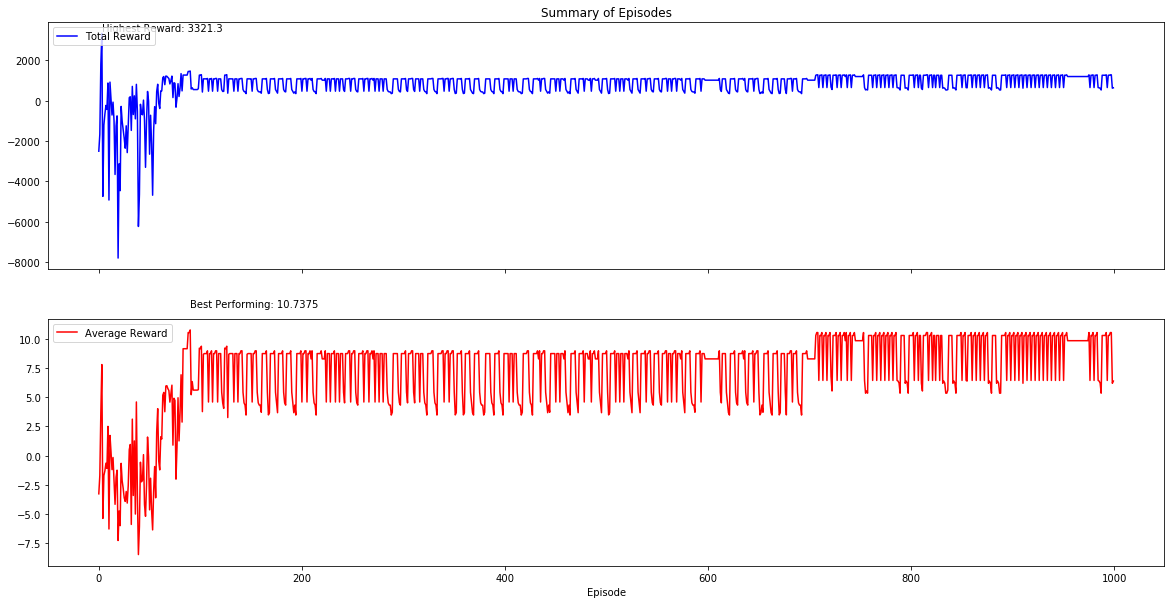

Episode with highest Reward: 4
Episode with highest Average reward per trade: 91


In [10]:

Q_learning._overall_summary()


After Training, Q Table is complete

# Testing

Testing the new Q Table on unseen data. 

In [15]:
Q_learning.test(100)

End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1306.7, Average Reward is 18.9376811594
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1320.6, Average Reward is 19.4205882353
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1151.6, Average Reward is 16.4514285714
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1296.9, Average Reward is 18.2661971831
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1202.3, Average Reward is 14.662195122
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 967.5, Average Reward is 13.2534246575
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1067.0, Average Reward is 13.1728395062
End of Test Period from 2013-09-05 20:00:00 to 2017-05-12 20:00:00, Total pips: 1168.8, Average Reward is 14.0819277108
End of Test Period from 2013-09-05 20:00:0

    Similarly, summary of the testing phase can be generated using the same function, after testing is done.

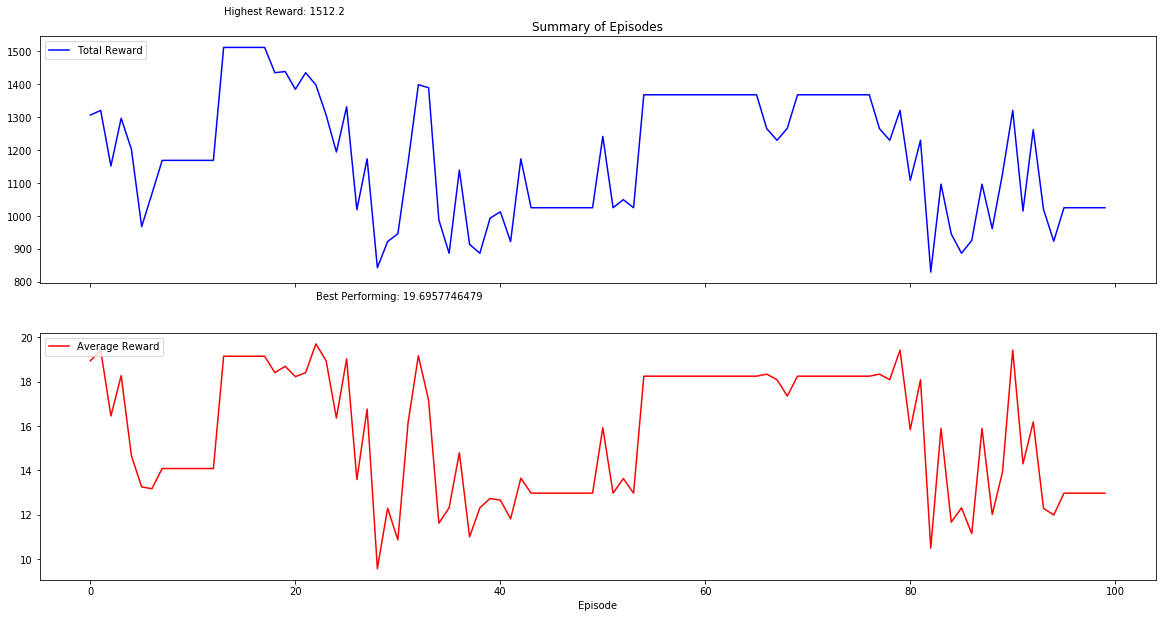

Episode with highest Reward: 14
Episode with highest Average reward per trade: 23


In [16]:
Q_learning._overall_summary()

# Episode  Review

The following function allows an in-depth review of trading activities within a stated episode.

SUMMARY OF EPISODE 23 

Total Trades Taken: 71
45 Buys, 26 Sells
Total Reward: 1398.4
Reward: 310.79999999998745 pips(Buy), 1087.6000000000022 pips(Sell) 

Average Reward: 19.6957746479
Win Ratio: 53.5211267606 % 



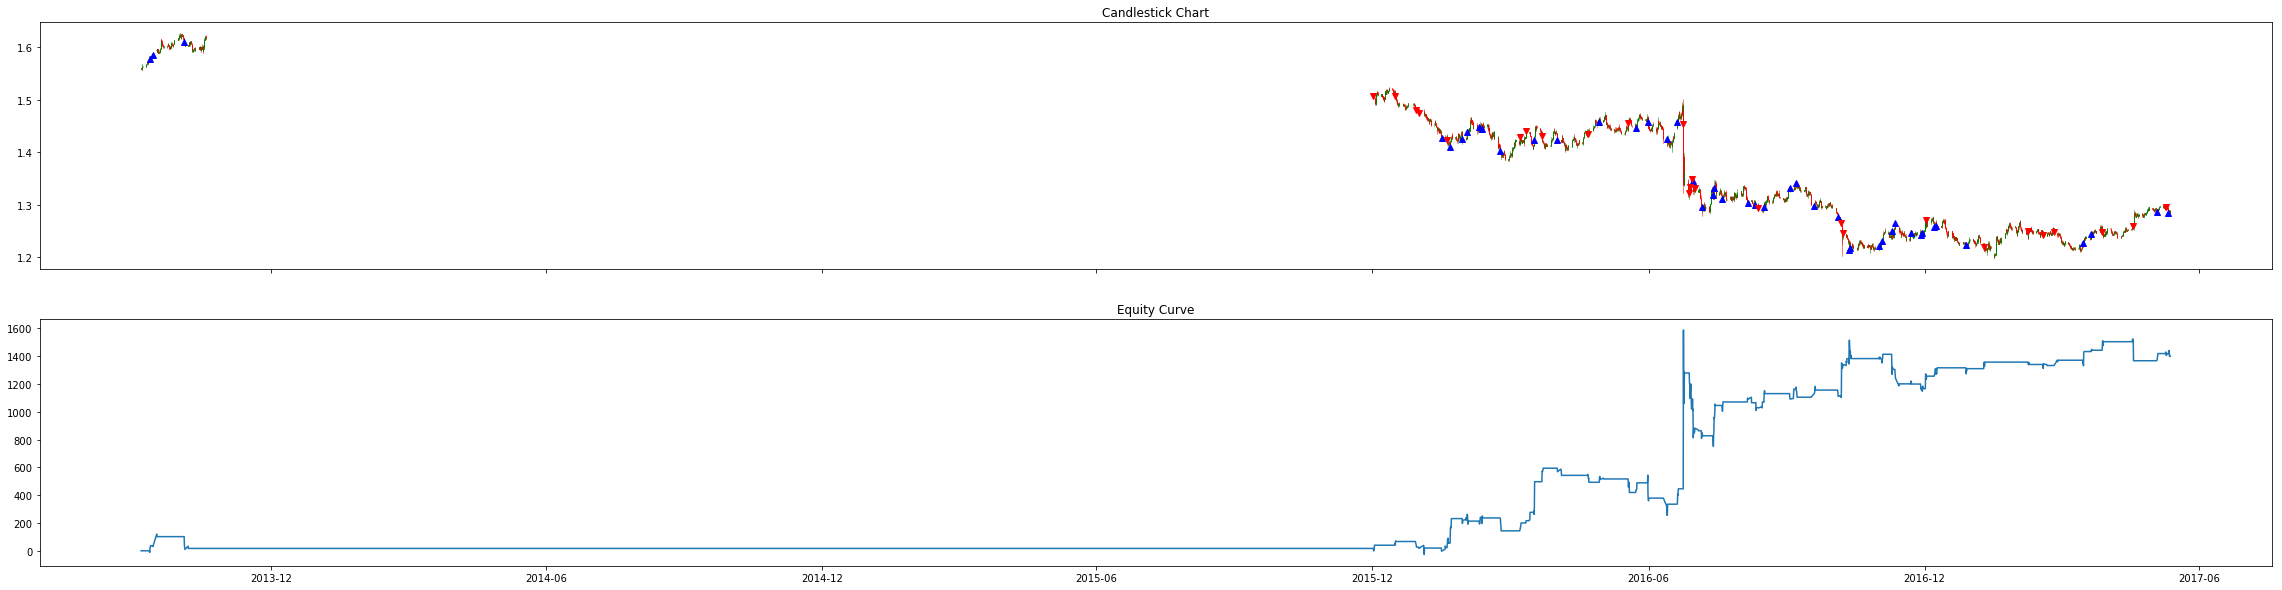

    Entry Price          Entry Time  Exit Price           Exit Time  Profit  \
0       1.57873 2013-09-11 12:00:00     1.58255 2013-09-12 04:00:00    35.2   
1       1.58671 2013-09-13 16:00:00     1.59367 2013-09-16 08:00:00    66.6   
2       1.61077 2013-10-04 12:00:00     1.60259 2013-10-07 04:00:00   -84.8   
3       1.50645 2015-12-01 16:00:00     1.50384 2015-12-02 08:00:00    23.1   
4       1.50545 2015-12-15 20:00:00     1.50247 2015-12-16 12:00:00    26.8   
5       1.47982 2015-12-29 16:00:00     1.48360 2015-12-30 08:00:00   -40.8   
6       1.47329 2015-12-31 20:00:00     1.47363 2016-01-04 12:00:00    -6.4   
7       1.42757 2016-01-15 20:00:00     1.42820 2016-01-18 12:00:00     3.3   
8       1.42180 2016-01-19 16:00:00     1.41830 2016-01-20 08:00:00    32.0   
9       1.41012 2016-01-21 16:00:00     1.42808 2016-01-22 08:00:00   176.6   
10      1.42535 2016-01-29 16:00:00     1.42444 2016-02-01 08:00:00   -12.1   
11      1.43854 2016-02-01 20:00:00     1.43822 2016

In [17]:
Q_learning.episode_review(23)